In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [12]:
ted = pd.read_csv('D:/PYTHONDATA/ted-talks/ted_main.csv')

In [23]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


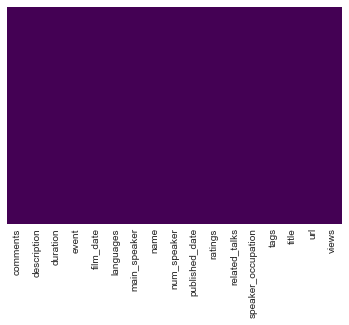

In [13]:
sns.heatmap(ted.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Correlation is: 0.04874042904795984


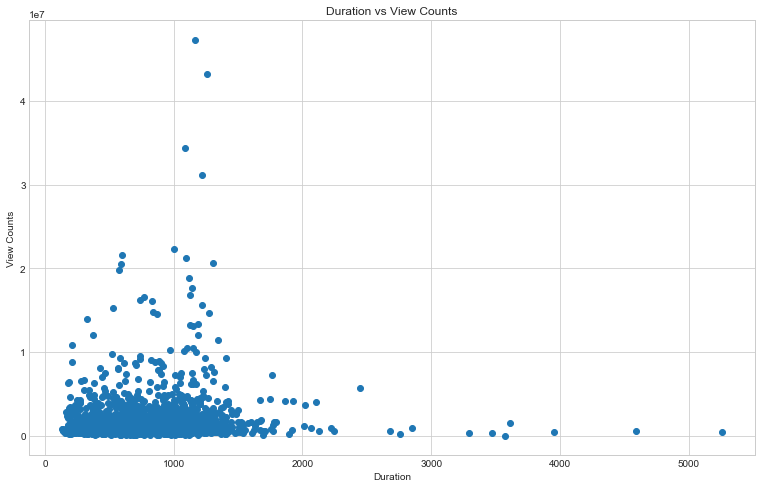

In [14]:
viewCounts = ted.iloc[:,16].values
duration = ted.iloc[:,[2]].values
plt.figure(figsize=(13,8))
plt.scatter(duration, viewCounts)
plt.xlabel('Duration')
plt.ylabel('View Counts')
plt.title('Duration vs View Counts')
correlation = ted['views'].corr(ted['duration'])
print("{}{}".format("Correlation is: ", correlation))

In [15]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


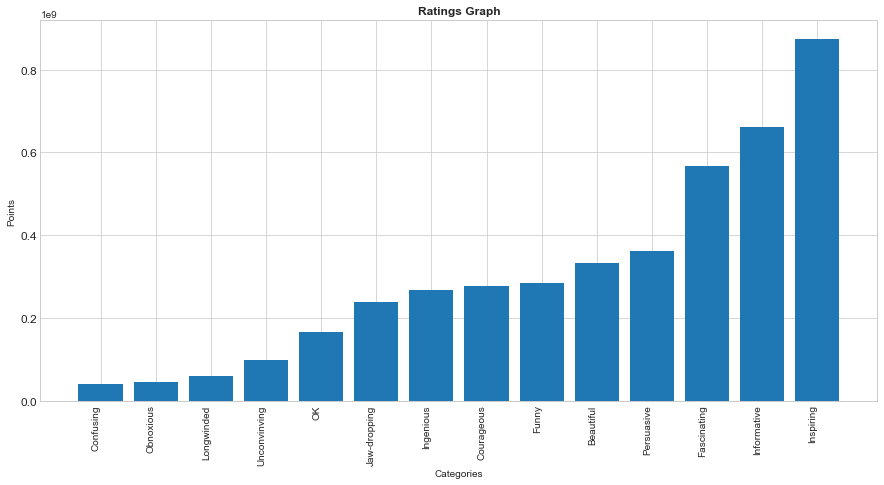

In [18]:
import ast
all_ratings = [0]*28
count=0
for i in range(1,len(ted)):
    ratings = ted.iloc[i, 10]
    current_rating = ast.literal_eval(ratings)
    total_ratings_count = sum(item['count'] for item in current_rating)
    all_ratings
    for item in current_rating:
        all_ratings[item['id']] += (item['count']/total_ratings_count)*ted.iloc[i,16]

all_ratings = list(filter(lambda a: a!=0, all_ratings))
axis = ['Beautiful', 'Confusing', 'Courageous', 'Funny', 'Informative', 'Ingenious', 'Inspiring',
       'Longwinded', 'Unconvinving', 'Fascinating', 'Jaw-dropping', 'Persuasive', 'OK', 'Obnoxious']

sorted_values, sorted_axis = zip(*sorted(zip(all_ratings, axis)))
plt.figure(figsize=(15,7))
plt.bar(range(len(sorted_axis)),sorted_values)
plt.xlabel('Categories')
plt.ylabel('Points')
plt.xticks(range(len(sorted_values)), sorted_axis, rotation=90, horizontalalignment='right')
plt.yticks(size='large')
plt.title("Ratings Graph", weight='bold', size='large')
plt.show()


In [20]:
import statistics
import operator
views_median = statistics.median(ted.iloc[:,16])
all_tags = dict()
for i in range(len(ted)):
    tags = ted.iloc[i,13]
    tags = ast.literal_eval(tags)
    for tag in tags:
        score=(ted.iloc[i,16]-views_median)
        if tag in all_tags:
            all_tags[tag]+=score
        else:
            all_tags[tag]=score
sorted_tags = sorted(all_tags.items(), key=operator.itemgetter(1))


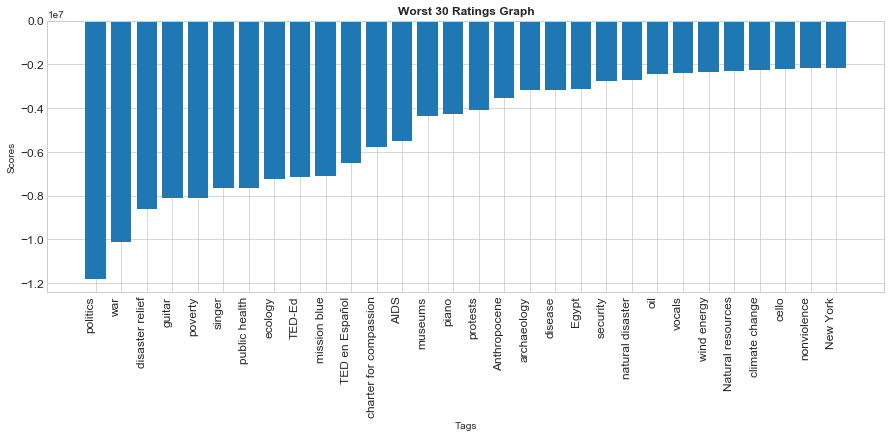

In [21]:

sorted_tags_worst=sorted_tags[0:30]
sorted_tags_worst, sorted_numbers_worst = zip(*sorted_tags_worst)

plt.figure(figsize=(15,5))
plt.bar(range(len(sorted_tags_worst)),sorted_numbers_worst)
plt.xlabel('Tags')
plt.ylabel('Scores')
plt.xticks(range(len(sorted_tags_worst)), sorted_tags_worst, rotation=90, horizontalalignment='right', size='large')
plt.yticks(size='large')
plt.title("Worst 30 Ratings Graph", weight='bold', size='large')
plt.show()


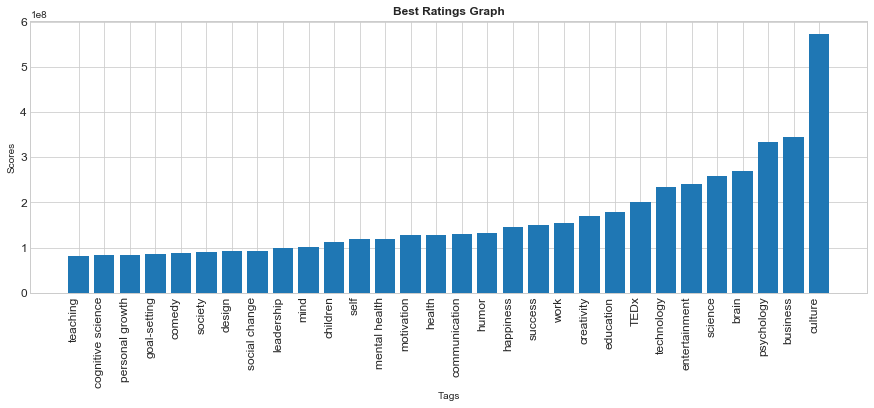

In [22]:
sorted_tags_best=sorted_tags[len(sorted_tags)-30:len(sorted_tags)]
sorted_tags_best, sorted_numbers_best = zip(*sorted_tags_best)

plt.figure(figsize=(15,5))
plt.bar(range(len(sorted_tags_best)),sorted_numbers_best)
plt.xlabel('Tags')
plt.ylabel('Scores')
plt.xticks(range(len(sorted_tags_best)), sorted_tags_best, rotation=90, horizontalalignment='right', size='large')
plt.yticks(size='large')
plt.title("Best Ratings Graph", weight='bold', size='large')
plt.show()
